# Customer Analysis Round 3 EDA
1. Show DataFrame info.
2. Describe DataFrame.
3. Show a plot of the total number of responses.
4. Show a plot of the response rate by the sales channel.
5. Show a plot of the response rate by the total claim amount.
6. Show a plot of the response rate by income.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
file_name = 'marketing_customer_analysis.csv'
df = pd.read_csv('csv_files/'+file_name)

### Show DataFrame info

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Describe DataFrame

In [11]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Show a plot of the total number of responses

In [16]:
#total number of responses
responses = df[['Response']].value_counts().reset_index()
responses

,Response,count
0,No,7826
1,Yes,1308


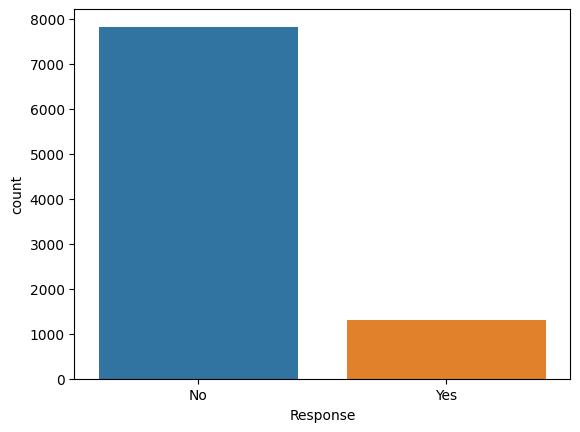

In [17]:
sns.barplot(data=responses, x='Response', y='count')
plt.show()

### Show a plot of the response rate by the sales channel

In [25]:
sales_channel_response = df.groupby('Sales Channel')[['Response']].value_counts().reset_index()
sales_channel_response

,Sales Channel,Response,count
0,Agent,No,2811
1,Agent,Yes,666
2,Branch,No,2273
3,Branch,Yes,294
4,Call Center,No,1573
5,Call Center,Yes,192
6,Web,No,1169
7,Web,Yes,156


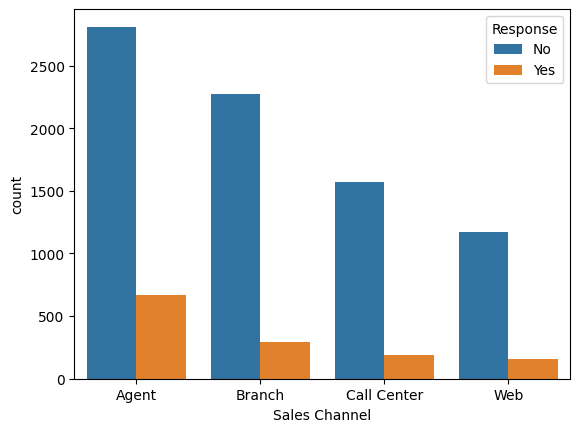

In [28]:
sns.barplot(data=sales_channel_response, x='Sales Channel', y='count', hue='Response')
plt.show()

### Show a plot of the response rate by the total claim amount

In [32]:
total_claim_response = df.groupby('Response')[['Total Claim Amount']].sum().reset_index()
total_claim_response['Total Claim Amount']=round(total_claim_response['Total Claim Amount'],2)
total_claim_response

,Response,Total Claim Amount
0,No,3381493.27
1,Yes,583473.78


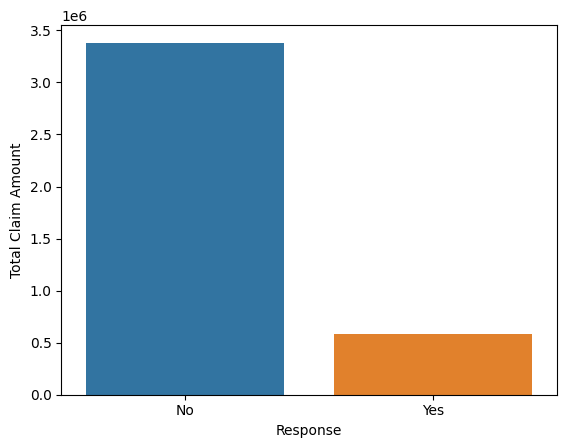

In [33]:
sns.barplot(data=total_claim_response, x='Response', y='Total Claim Amount')
plt.show()

### Show a plot of the response rate by income

<Axes: xlabel='Income', ylabel='Response'>

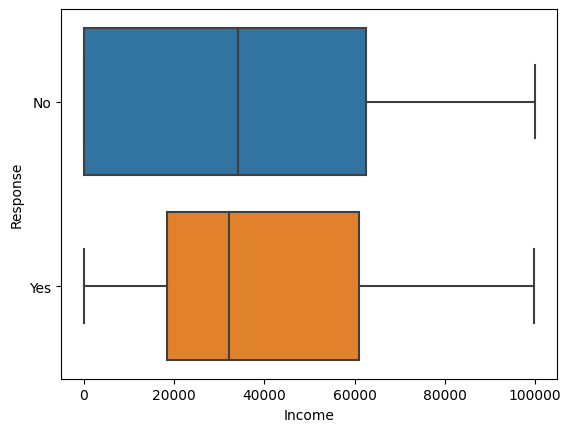

In [37]:
#response rate by income
sns.boxplot(data=df, x='Income', y='Response')

<Axes: xlabel='Income', ylabel='Count'>

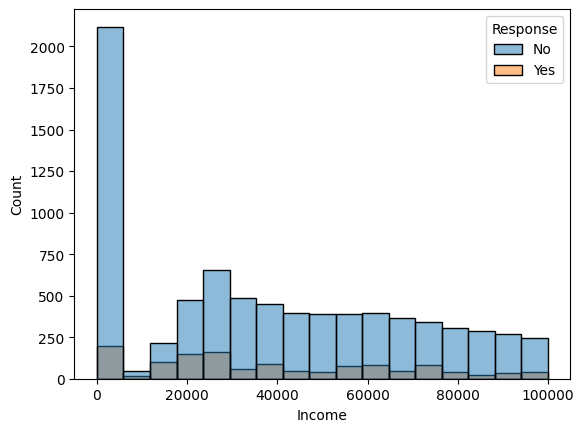

In [40]:
sns.histplot(data=df, x='Income', hue = 'Response')